# **Public Transportation Transaction Transjakarta**
---

## **Konteks**
Transjakarta adalah sebuah sistem transportasi Bus Rapid Transit sejak tahun 2004 di Jakarta, Indonesia. Transjakarta memiliki 260 halte yang tersebar dalam 13 koridor utama dan 10 rute lintas koridor. Kini, Transjakarta terbagi dalam tiga jenis armada, yaitu Regular Transjakarta, Royaltrans, dan Jaklingko . Dalam konteks ini, ingin dicari tahu aspek-aspek yang dapat dijadikan sebuah temuan berdasarkan data transaksi yang dimiliki Transjakarta.

*Sumber* : https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo

## **Problems & Goals**

Dalam konteks pengembangan sistem transportasi Transjakarta, ada beberapa masalah dan tujuan yang ingin dipecahkan. Salah satu fokus utama adalah meningkatkan efektivitas, efisiensi, dan profitabilitas operasional Transjakarta. Untuk mencapai tujuan ini, akan dijelajahi berbagai aspek yang dapat menjadi temuan, termasuk aspek-aspek berikut:

**Payment** (Pembayaran): Menganalisis data transaksi pembayaran, khususnya dalam hal jenis kartu yang paling sering digunakan oleh pengguna Transjakarta. Ini akan membantu *Transjakarta* dalam mengoptimalkan strategi pembayaran dan meningkatkan pendapatan.

**Pengguna Transjakarta**: Mengidentifikasi profil pengguna Transjakarta, termasuk data berdasarkan jenis kelamin dan kelompok usia. Informasi ini akan membantu *Transjakarta* memahami perilaku pengguna dan merancang strategi pemasaran yang lebih efektif.

**Koridor dan Rute Perjalanan**: Analisis koridor yang paling sering digunakan dan pola perjalanan pengguna untuk mengevaluasi kinerja koridor. Dengan pemahaman yang lebih baik tentang preferensi pengguna, *Transjakarta* dapat mengoptimalkan layanan di koridor yang paling diminati.

Dari 3 hal yang disebutkan, diharapkan bisa membantu **stakeholders** terkait yaitu **Divisi Operasional dan Pelayanan & Bisnis Transjakarta** yang juga berkolaborasi dengan **PT JakLingko**.

## **Pemahaman Data**

Hal pertama yang dilakukan sebelum mengolah dan menganalisi data ialah **pemahaman dari dataset itu sendiri**. Disini saya akan melihat dataset Transjakarta dan memahami semua informasi yang didapat dari dataset ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [3]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

Dataset ini berisi data Transjakarta di bulan **April 2023**. Setelah melihat dan memahami informasi dari dataset ini, saya menemukan informasi apa saja yang saya miliki yang dilihat dari kolom yang ada, dataset ini memiliki 22 kolom yang berisikan informasi, antara lain:

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `transID`           | Unik ID transaksi setiap transaksi             |
| `payCardID`         | ID kartu yang digunakan pengguna sebagai alat bayar |
| `payCardBank`       | Jenis kartu yang digunakan pengguna Transjakarta |
| `payCardName`       | Nama pengguna yang tertanam dalam kartu       |
| `payCardSex`        | Jenis kelamin pengguna yang tertanam dalam kartu |
| `payCardBirthDate`  | Tahun lahir pengguna kartu                     |
| `corridorID`        | Kode jenis rute                                |
| `corridorName`      | Nama rute beserta start dan finish-nya         |
| `direction`         | Terdapat 0 dan 1 dimana 0 adalah arah pergi dan 1 arah balik rute |
| `tapInStops`        | ID halte pengguna tap masuk (Entrance)         |
| `tapInStopsName`    | Nama halte pengguna tap masuk                   |
| `tapInStopsLat`     | Koordinat latitude halte pengguna tap masuk    |
| `tapInStopsLon`     | Koordinat longitude halte pengguna tap masuk   |
| `stopStartSeq`      | Menunjukkan pemberhentian keberapa berdasarkan direction |
| `tapInTime`         | Waktu pengguna tap masuk berupa tanggal dan jam |
| `tapOutStops`       | ID halte pengguna tap keluar (Exit)            |
| `tapOutStopsName`   | Nama halte pengguna tap keluar                  |
| `tapOutStopsLat`    | Koordinat latitude halte pengguna tap keluar   |
| `tapOutStopsLon`    | Koordinat longitude halte pengguna tap keluar  |
| `stopEndSeq`        | Menunjukkan pemberhentian keberapa berdasarkan direction |
| `tapOutTime`        | Waktu pengguna tap keluar berupa tanggal dan jam |
| `payAmount`         | Harga yang dibayar oleh pengguna               |

Ada 8 kolom tambahan, yaitu:

| Kolom         | Deskripsi                                 |
| ------------- | ---------------------------------------- |
| `transType`   | Jenis Transjakarta yang digunakan dalam transaksi |
| `tapInHour`   | Waktu tap masuk pengguna |
| `tapOutHour`  | Waktu tap keluar pengguna |
| `tapDay`      | Hari saat pengguna melakukan tap masuk atau tap keluar |
| `tripDuration`| Durasi atau lama perjalanan dari titik tap masuk hingga titik tap keluar dalam satuan jam |
| `tripCategory`| Kategori atau label yang menggambarkan jenis perjalanan |
| `age`         | Usia pengguna kartu transaksi |
| `ageGroup`    | Kelompok usia pengguna kartu transaksi |

## **Data Cleaning**
---

Hal yang perlu dilakukan berikutnya ialah **Data Cleaning**. Proses ini bertujuan untuk mengetahui apakah dalam data ini terdapat *missing value, duplikasi, ataupun anomali* demi efektifitas analisis data yang seharusnya.

In [4]:
# Cek Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [5]:
# Cek Duplikasi Data
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated rows found.")

No duplicated rows found.


Setelah dilakukan pengecekan duplikasi data, dataset ini tidak memiliki data yang sama atau duplikat.

In [6]:
# Cek Missing Value
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Ada 10 kolom yang terdapat *missing value*. Ada 5 kolom dengan jumlah *missing value* yang sama yaitu, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`.

In [7]:
# Melihat Missing Value di tiap baris/kolom
missing_values = df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']].isna()
rows_with_missing_values = df[missing_values.any(axis=1)]
rows_with_missing_values


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37882,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,...,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,...,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


Setelah melihat semua *missing value*nya, ada kolom yang dapat diisi *missing value*nya dan ada juga kolom yang tidak dapat diisi.

In [8]:
# Mengisi Missing Value di 'payAmount' berdasarkan 'corridorID'
df.loc[df['corridorID'] == 'JAK', 'payAmount'].fillna(0, inplace=True)


In [9]:
payAmountbyCorridorID = pd.crosstab(df['corridorID'], df['payAmount'])
payAmountbyCorridorID

payAmount,0.0,3500.0,20000.0
corridorID,,,
1,0,236,0
10,0,101,0
10A,147,0,0
10B,139,0,0
10D,0,164,0
...,...,...,...
S21,0,388,0
S22,0,136,0
S31,0,0,151


Disini menggunakan crosstab untuk melihat data yang terdapat di kolom `corridorID`. Selanjutnya, akan diisi *missing value* di `payAmount` berdasarkan `corridorID`.

In [10]:
def fill_pay_amount(row):
    if row['corridorID'] in ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']:
        return 20000
    elif row['corridorID'] in ['10A', '10B', '11B', '11C', '11K', '11M', '11N', '11P', '12C', '12F', '2E', '2F', '2H', '3A', '3B', '3C', '4E', '9F', 'BW9', 'JAK']:
        return 0
    else:
        return 3500

# Mengisi nilai
df['payAmount'] = df.apply(lambda row: fill_pay_amount(row) if pd.isna(row['payAmount']) else row['payAmount'], axis=1)

In [11]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

Sekarang *missing value* di `payAmount` sudah tidak ada.

Untuk sisa kolom yang masih terdapat *missing value*, diperlukan melihat kembali apakah ada kesinambungan antar data berikut. Karena tidak ditemukannya hubungan antar kolom yang ada di dataset maka dilakukan drop untuk baris yang terdapat *missing value*.

In [12]:
# Menghapus sisa yang terdapat Missing Value
df.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'], inplace=True)

In [13]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Data sudah clear dari *missing value*
.

Kolom `payCardName` akan di drop karena dianggap anomali karena setelah dilihat datanya tidak ada kesinambungan dimana ada nama dengan gelar doktor tetapi tahun kelahirannya 2008, hal tersebut sangat tidak wajar maka dari itu kolom `payCardName` akan di drop.

In [14]:
# Drop kolom nama pengguna kartu karna tidak akan digunakan
df.drop('payCardName', axis=1, inplace=True)

In [15]:
# Cek Tipe Data
df.dtypes

transID              object
payCardID             int64
payCardBank          object
payCardSex           object
payCardBirthDate      int64
corridorID           object
corridorName         object
direction           float64
tapInStops           object
tapInStopsName       object
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq          int64
tapInTime            object
tapOutStops          object
tapOutStopsName      object
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
tapOutTime           object
payAmount           float64
dtype: object

In [16]:
# Mengubah data type payAmount menjadi Integer
df['payAmount'] = df['payAmount'].astype('int64')

In [17]:
# Membuat kolom baru untuk jenis Transjakarta yang digunakan
def determine_trans_type(payAmount):
    if payAmount == 20000:
        return 'RoyalTrans'
    elif payAmount == 3500:
        return 'Regular Tj'
    else:
        return 'JakLingko'

df['transType'] = df['payAmount'].apply(determine_trans_type)

df

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,...,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500,Regular Tj
37896,YHHK837P6Y95GN,6502902290603767,dki,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,...,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500,Regular Tj
37897,YXPP627N4G95HO,213159426675861,emoney,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,...,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000,RoyalTrans
37898,RGVK175U2U98UV,377840859133591,emoney,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,...,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0,JakLingko


`tapInTime` dan `tapOutTime` diubah tipe datanya ke format datetime. Lalu membuat kolom baru yaitu `tapInHour` dan `tapOutHour` untuk mengetahu pengguna melakukan tap in dan tap out di jam berapa.

In [18]:
# Mengubah Tipe Data untuk Tap In dan Tap Out time, lalu membuat kolom tap in&out Hour dan juga Day
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['tapDay'] = df['tapInTime'].dt.dayofweek
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,5,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,5,6,0
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,5,6,0
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,5,6,0
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,6,6,0


Membuat kolom baru `tripDuration` untuk mengetahui lama perjalanan pengguna Transjakarta.

In [19]:
# Membuat kolom Trip Duration (dalam jam)
df['tripDuration'] = df['tapOutHour'] - df['tapInHour']
df['tripDuration'] = df['tripDuration'].apply(lambda x: 'Under 1 Hour' if x == 0 else x)

In [20]:
df['tripDuration'].value_counts()

tripDuration
1               18814
2               10158
Under 1 Hour     3576
3                  46
-21                 1
Name: count, dtype: int64

Disini ditemukan anomali dimana ada nilai bernilai -21, selanjutnya akan dicari tahu di baris mana yang terdapat anomali itu.

In [21]:
df[df['tripDuration'] == -21]

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay,tripDuration
37615,JEES739W6T40LL,3563362178943707,dki,F,1968,2E,Rusun Rawa Bebek - Kodamar,0.0,B00554P,Gg. Sawo 1,...,-6.17911,106.90255,25.0,2023-04-25 00:30:08,0,JakLingko,21,0,0,-21


Ternya anomali itu terdapat di index baris 37615. Nilai -21 itu karena pengguna tersebut melakukan tap in di jam 21.00 dan dan tap out di pukul 00.00. Karena cara yang dilakukan untuk membuat `tripDuration` jam tap out dikurang tap in, maka dilakukan sedikit perubahan.

In [22]:
# Mengatasi tripDuration yang isinya -21 dan seharusnya berisi 3
df['tripDuration'] = df.apply(lambda row: row['tripDuration'] + 24 if row['tripDuration'] == -21 else row['tripDuration'], axis=1)
df['tripDuration'].value_counts()

tripDuration
1               18814
2               10158
Under 1 Hour     3576
3                  47
Name: count, dtype: int64

Nilai -21 tadi kini sudah berubah menjadi 3.

Karena nilai di kolom `tapDay` masih berupa angka, maka akan diisi berdasarkan harinya.

In [23]:
# mengisi value untuk kolom tapDay
df['tapDay'] = df['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,5,6,Monday,1
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,5,6,Monday,1
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,5,6,Monday,1
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,5,6,Monday,1
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,6,6,Monday,Under 1 Hour


Kini kolom `tapDay` sudah berisi nilai dengan nama hari.

Selanjutnya ialah membuat kolom baru bernama `tripCategory`. Kolom ini ditujukan untuk mengetahui jenis lama perjalanan pengguna.

In [24]:
# Membuat kolom Trip Category
def categorize_trip_duration(trip_duration):
    if trip_duration == 'Under 1 Hour':
        return 'Very Short Trip'
    elif trip_duration == 1:
        return 'Short Trip'
    elif trip_duration == 2:
        return 'Medium Trip'
    else:
        return 'Long Trip'

df['tripCategory'] = df['tripDuration'].apply(categorize_trip_duration)
df

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay,tripDuration,tripCategory
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,5,6,Monday,1,Short Trip
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,5,6,Monday,1,Short Trip
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,5,6,Monday,1,Short Trip
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,5,6,Monday,1,Short Trip
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,6,6,Monday,Under 1 Hour,Very Short Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,...,106.82365,13.0,2023-04-21 19:55:49,3500,Regular Tj,18,19,Friday,1,Short Trip
37896,YHHK837P6Y95GN,6502902290603767,dki,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,...,106.88634,2.0,2023-04-18 22:28:22,3500,Regular Tj,21,22,Tuesday,1,Short Trip
37897,YXPP627N4G95HO,213159426675861,emoney,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,...,106.89628,14.0,2023-04-04 13:27:25,20000,RoyalTrans,10,13,Tuesday,3,Long Trip
37898,RGVK175U2U98UV,377840859133591,emoney,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,...,106.81135,34.0,2023-04-15 20:27:50,0,JakLingko,19,20,Saturday,1,Short Trip


Kolom `tripCategory` sudah terisi nilai Short Trip, Medium Trip, dan Long Trip. Very Short Trip adalah jika perjalanan dilakukan dibawah satu jam, Short Trip adalah perjalanan yang dilakukan selama satu jam, Medium Trip jika perjalanan dilakukan selama 2 jam, dan Long Trip adalah jika perjalanan lebih dari 2 jam.

Selanjutnya membuat kolom `age` yang berisikan usia dari pengguna.

In [25]:
# Membuat kolom umur pengguna
df['age'] = 2023 - df['payCardBirthDate']
df

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay,tripDuration,tripCategory,age
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,12.0,2023-04-03 06:00:53,3500,Regular Tj,5,6,Monday,1,Short Trip,15
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,21.0,2023-04-03 06:40:01,3500,Regular Tj,5,6,Monday,1,Short Trip,26
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,39.0,2023-04-03 06:50:55,3500,Regular Tj,5,6,Monday,1,Short Trip,31
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,29.0,2023-04-03 06:28:16,3500,Regular Tj,5,6,Monday,1,Short Trip,45
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,15.0,2023-04-03 06:57:03,3500,Regular Tj,6,6,Monday,Under 1 Hour,Very Short Trip,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,...,13.0,2023-04-21 19:55:49,3500,Regular Tj,18,19,Friday,1,Short Trip,19
37896,YHHK837P6Y95GN,6502902290603767,dki,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,...,2.0,2023-04-18 22:28:22,3500,Regular Tj,21,22,Tuesday,1,Short Trip,49
37897,YXPP627N4G95HO,213159426675861,emoney,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,...,14.0,2023-04-04 13:27:25,20000,RoyalTrans,10,13,Tuesday,3,Long Trip,47
37898,RGVK175U2U98UV,377840859133591,emoney,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,...,34.0,2023-04-15 20:27:50,0,JakLingko,19,20,Saturday,1,Short Trip,47


Berikutnya membuat kolom `ageGroup` yang berisikan kelompok umur pengguna.

In [26]:
# Membuat kolom Age Group
def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 22:
        return '18-22'
    elif 23 <= age <= 30:
        return '23-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return 'Elderly'

# Menerapkan fungsi untuk membuat kolom 'ageGroup'
df['ageGroup'] = df['age'].apply(categorize_age)
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay,tripDuration,tripCategory,age,ageGroup
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,...,2023-04-03 06:00:53,3500,Regular Tj,5,6,Monday,1,Short Trip,15,Under 18
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,...,2023-04-03 06:40:01,3500,Regular Tj,5,6,Monday,1,Short Trip,26,23-30
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,...,2023-04-03 06:50:55,3500,Regular Tj,5,6,Monday,1,Short Trip,31,31-40
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,...,2023-04-03 06:28:16,3500,Regular Tj,5,6,Monday,1,Short Trip,45,41-50
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,...,2023-04-03 06:57:03,3500,Regular Tj,6,6,Monday,Under 1 Hour,Very Short Trip,41,41-50


Sebelum memulai analisis, kita harus melihat sebaran data atau outliers yang terdapat dalam data. Bertujuan mengetahui apakah data terdistribusi normal atau tidak.

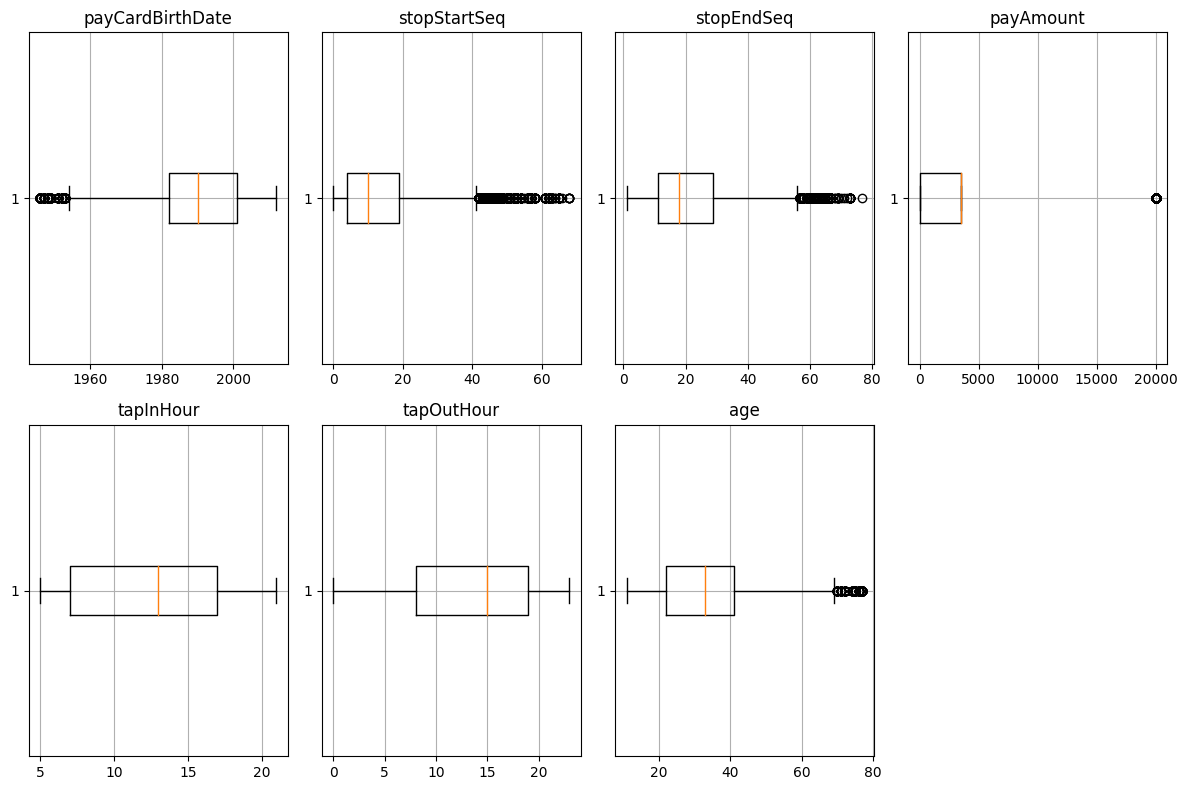

In [48]:
# Melihat sebaran data atau outliers
columnscheck = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount', 'tapInHour', 'tapOutHour', 'age']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columnscheck):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'{column}')
    plt.grid()

plt.tight_layout()
plt.show()

In [49]:
# Uji Normalitas
from scipy.stats import kstest

kolom_uji = ['payCardBirthDate','stopStartSeq','stopEndSeq','payAmount','tapInHour','tapOutHour','age']

list = []

#Melakukan looping uji normalitas untuk setiap kolom yang sudah ditaruh dalam list kolom_uji
for i in kolom_uji : 
    ks,pvalue = kstest((df[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,payCardBirthDate,0.0,berdistribusi tidak normal
1,stopStartSeq,0.0,berdistribusi tidak normal
2,stopEndSeq,0.0,berdistribusi tidak normal
3,payAmount,0.0,berdistribusi tidak normal
4,tapInHour,0.0,berdistribusi tidak normal
5,tapOutHour,0.0,berdistribusi tidak normal
6,age,0.0,berdistribusi tidak normal


Kolom yang dilihat yaitu kolom-kolom yang berisikan nilai numerikal. Berdasarkan temuan diatas, data *tidak terdistribusi normal*.

Terakhir, export data yang sudah clean ke Excel.

In [29]:
# Export data clean ke excel
df.to_excel('Transjakarta.xlsx', index=False)

## **Data Analysis**
---

Setelah dataset sudah clean dari *duplikasi, missing value, dan anomali*, kini masuk ke tahap analisis. Sesuai *problems dan goals*, analisis yang akan dibuat terbagi menjadi tiga segmen, yaitu **Payment, Pengguna Transjakarta, dan Koridor**.

In [30]:
# Melihat Dataset yang Sudah Clean
pd.set_option('display.max_columns', None)
df.head()

,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transType,tapInHour,tapOutHour,tapDay,tripDuration,tripCategory,age,ageGroup
0,EIIW227B8L34VB,180062659848800,emoney,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,5,6,Monday,1,Short Trip,15,Under 18
1,LGXO740D2N47GZ,4885331907664776,dki,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,5,6,Monday,1,Short Trip,26,23-30
2,DJWR385V2U57TO,4996225095064169,dki,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,5,6,Monday,1,Short Trip,31,31-40
3,JTUZ800U7C86EH,639099174703,flazz,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,5,6,Monday,1,Short Trip,45,41-50
4,VMLO535V7F95NJ,570928206772,flazz,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,6,6,Monday,Under 1 Hour,Very Short Trip,41,41-50


### **Payment**

Di segmen ini, saya akan menganalisis jenis pembayaran yang digunakan pengguna Transjakarta. Dari analisis ini Diharapkan bisa membantu Transjakarta dalam kerjasama dengan pihak yang membuat kartu transaksi yang nantinya dapat memberi profit untuk Transjakarta.

#### Distribusi Kartu Bank

In [31]:
# Mengetahui Jenis Kartu Yang Digunakan Untuk Pembayaran Transjakarta
payments = df['payCardBank'].value_counts().reset_index()
payments.columns = ['payCardBank', 'count']
payments

,payCardBank,count
0,dki,16035
1,emoney,5937
2,brizzi,3058
3,flazz,2782
4,online,2486
5,bni,2297


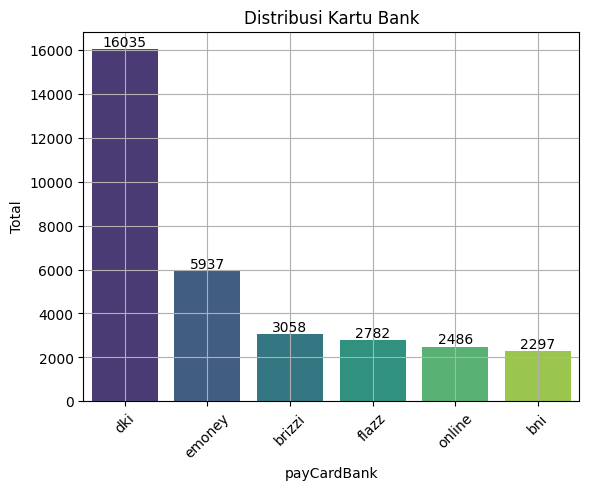

In [32]:
# Menampilkan Distribusi Kartu yang Digunakan Pembayaran Transjakarta
ax = sns.barplot(x='payCardBank', y='count', data=payments, palette='viridis')

# Menampilkan teks di atas setiap bar
for i, v in enumerate(payments['count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('payCardBank')
plt.ylabel('Total')
plt.title('Distribusi Kartu Bank')
plt.xticks(rotation=45)
plt.show()

Dari grafik diatas, **kartu dki** adalah kartu yang digunakan terbanyak oleh pengguna *Transjakarta* dengan total angka yang digunakan sebanyak **16035**, lalu dibawahnya ada emoney sebanyak 5937, brizzi 3058, flazz 2782, online 2486, dan bni dengan total penggunaan paling sedikit sebanyak 2297.

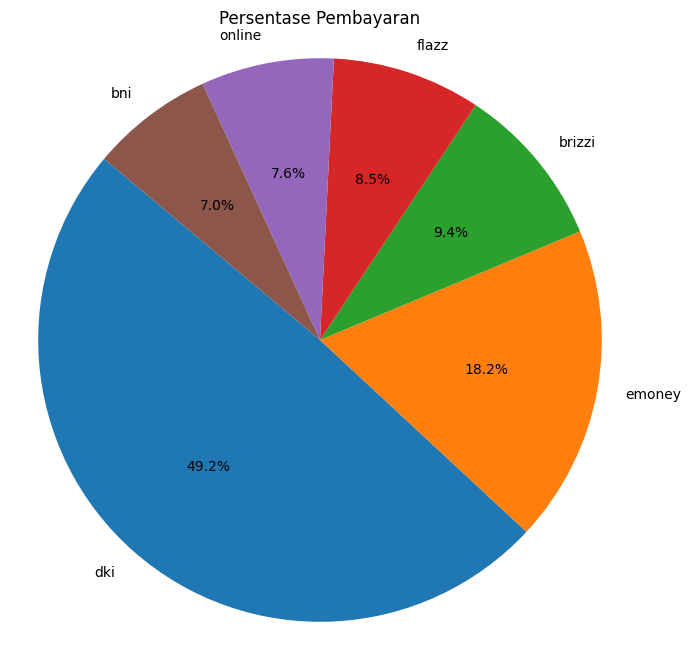

In [33]:
# Pie Chart
payment_counts = df['payCardBank'].value_counts()

labels = payment_counts.index
sizes = payment_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Persentase Pembayaran')
plt.show()


Untuk persentasenya, kartu dki tentu dengan persentase terbesar untuk kartu digunakan dengan nilai **49.2%**.

### **Pengguna Transjakarta**

Di segmen ini, saya akan menganalis pengguna Transjakarta. Dari analisis ini diharapkan dapat mempertahankan dan menaikkan jumlah pengguna Transjakarta untuk waktu kedepannya.

Membuat variabel baru *customer* yang berisikan kolom `payCardID`, `payCardBank`, `age`, `ageGroup`, `transType` lalu dilihat total dari masing-masing nilainya.

In [34]:
# Membuat variabel customer
customer = df[['payCardID','payCardBank','payCardSex','age','ageGroup','transType']].value_counts().reset_index()
customer

,payCardID,payCardBank,payCardSex,age,ageGroup,transType,count
0,36862448099508,bni,F,19,18-22,JakLingko,40
1,4705243679928131,dki,F,11,Under 18,Regular Tj,40
2,180029887732247,emoney,F,15,Under 18,JakLingko,39
3,4821029051872,online,F,19,18-22,JakLingko,39
4,4380073493099534,dki,M,45,41-50,JakLingko,39
...,...,...,...,...,...,...,...
2566,4742238627791,online,F,51,51-60,Regular Tj,1
2567,3583963796594222,dki,F,11,Under 18,Regular Tj,1
2568,3584962536745457,dki,M,42,41-50,Regular Tj,1
2569,3586400849118805,dki,M,40,31-40,Regular Tj,1


#### Jenis Kelamin Pengguna

In [35]:
# Membuat variabel gender
gender = customer['payCardSex'].value_counts().reset_index()
gender

,payCardSex,count
0,F,1375
1,M,1196


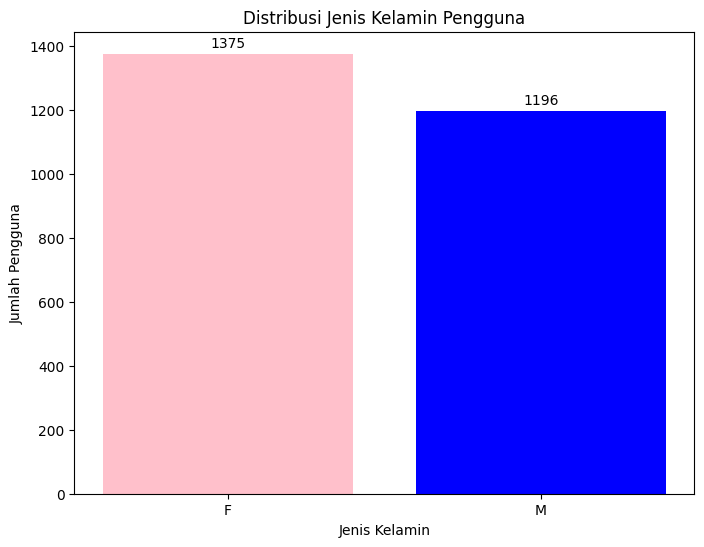

In [36]:
# Membuat Chart untuk Jenis Kelamin
labels = gender['payCardSex']
values = gender['count']

colors = ['pink', 'blue']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jenis Kelamin Pengguna')

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

Pengguna *Transjakarta* paling banyak berkelamin perempuan dengan **1375** pengguna.

#### Distribusi Kelompok Usia Pengguna

Membuat variabel *ageDistribution* untuk mengetahui kelompok umur apa yang paling banyak melakukan perjalanan.

In [37]:
# Membuat variabel age distribution
ageDistribution = customer['ageGroup'].value_counts().reset_index()
ageDistribution

,ageGroup,count
0,31-40,771
1,23-30,470
2,41-50,402
3,Under 18,378
4,18-22,271
5,51-60,220
6,Elderly,59


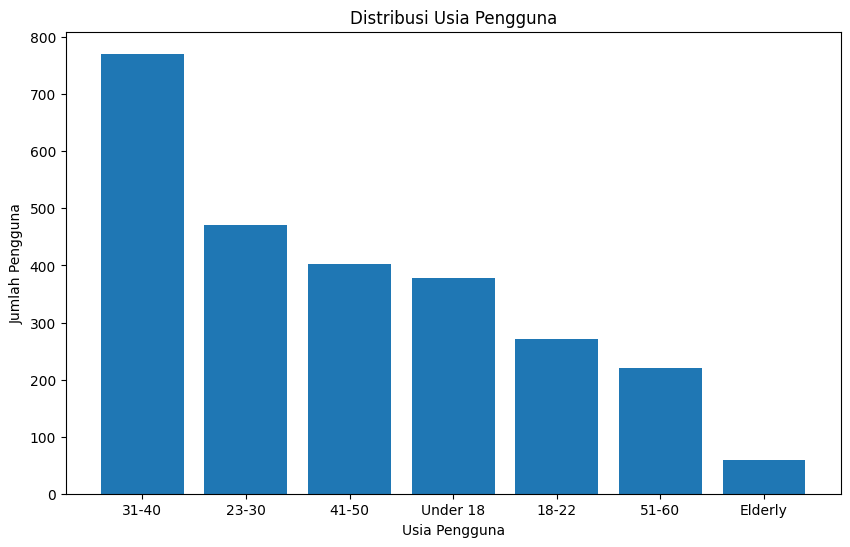

In [38]:
# Bar Chart Kelompok Usia Pengguna
labels = ageDistribution['ageGroup']
values = ageDistribution['count']

plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Usia Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Usia Pengguna')
plt.xticks()
plt.show()

Dari grafik diatas, kelompok umur **31-40** paling banyak melakukan perjalanan sebanyak **771 kali** dan **Elderly** atau lanjut usia yang paling dikit melakukan perjalanan hanya **59 Kali**.

#### Jenis Transjakarta yang Digunakan Oleh Pengguna Kartu DKI

Disini akan dibuat variabel baru untuk mengetahui jenis transjakarta apa yang digunakan oleh pengguna kartu dki. Kenapa hanya pengguna kartu dki saja karena dari segmen *payment* diketahui kartu yang paling banyak digunakan adalah dki yang berikutnya akan dijadikan sebuah rekomendasi Transjakarta untuk berkerja sama dengan dki.

In [39]:
# Membuat variabel baru
ageGroup_dki = customer[customer['payCardBank'] == 'dki']
ageGroup_dki = ageGroup_dki[['payCardID','payCardBank','ageGroup','transType']]
ageGroup_dki

,payCardID,payCardBank,ageGroup,transType
1,4705243679928131,dki,Under 18,Regular Tj
4,4380073493099534,dki,41-50,JakLingko
6,3565528607360162,dki,18-22,Regular Tj
7,4885706111446864,dki,31-40,JakLingko
9,6571636366239447,dki,31-40,JakLingko
...,...,...,...,...
2563,3582809689935223,dki,Under 18,Regular Tj
2567,3583963796594222,dki,Under 18,Regular Tj
2568,3584962536745457,dki,41-50,Regular Tj
2569,3586400849118805,dki,31-40,Regular Tj


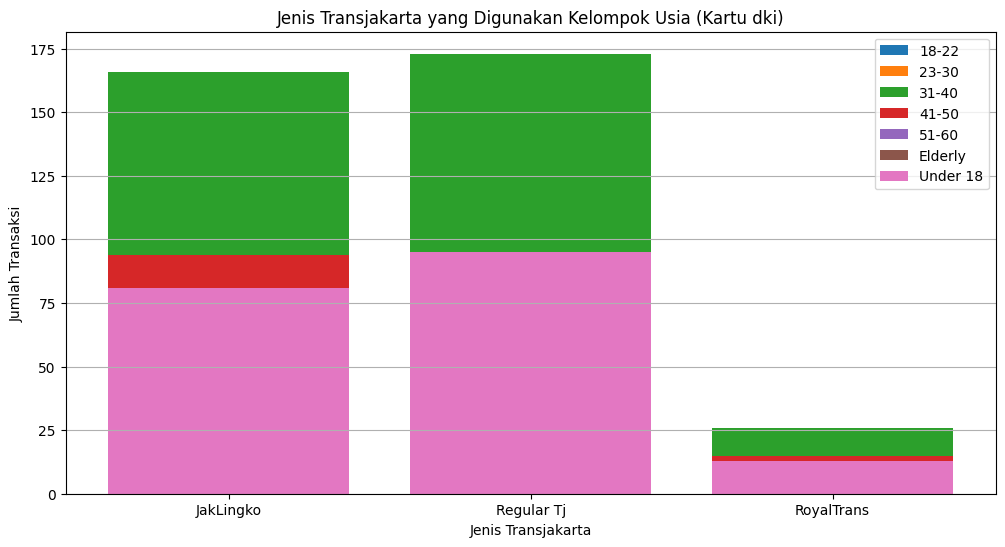

In [40]:
# Filter data untuk hanya mencakup 'payCardBank' dengan nilai 'dki'
ageGroup_dki = customer[customer['payCardBank'] == 'dki']
ageGroup_dki = ageGroup_dki[['payCardID', 'payCardBank', 'ageGroup', 'transType']]
grouped_data = ageGroup_dki.groupby(['ageGroup', 'transType']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))

for age_group in grouped_data['ageGroup'].unique():
    subset = grouped_data[grouped_data['ageGroup'] == age_group]
    plt.bar(subset['transType'], subset['count'], label=f'{age_group}')

plt.xlabel('Jenis Transjakarta')
plt.ylabel('Jumlah Transaksi')
plt.title('Jenis Transjakarta yang Digunakan Kelompok Usia (Kartu dki)')
plt.legend()
plt.grid(axis='y')

plt.show()

Dari grafik diatas, Regular Transjakarta paling banyak digunakan untuk perjalanan dan kelompok umur **Under 18** atau dibawah 18 tahun yang paling banyak menggunakan kartu dki.

### **Koridor**

Di segmen ini, akan dianalisis berdasarkar koridor. Analisis ini diharapkan memberi temuan yang bisa *Transjakarta* lakukan dalam hal **efektifitas dan efisiensi**.

In [41]:
# Membuat variabel koridor
koridor = df[['corridorID','corridorName','direction','transType','tapInHour','tapOutHour','tripDuration','tripCategory']].value_counts().reset_index()
koridor

,corridorID,corridorName,direction,transType,tapInHour,tapOutHour,tripDuration,tripCategory,count
0,JAK.06,Kampung Rambutan - Pondok Gede,0.0,JakLingko,6,7,1,Short Trip,27
1,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,Regular Tj,6,7,1,Short Trip,26
2,8C,Kebayoran Lama - Tanah Abang,1.0,Regular Tj,6,7,1,Short Trip,26
3,9D,Pasar Minggu - Tanah Abang,1.0,Regular Tj,17,18,1,Short Trip,25
4,6N,Ragunan - Blok M via Kemang,0.0,Regular Tj,6,7,1,Short Trip,25
...,...,...,...,...,...,...,...,...,...
9520,2A,Pulo Gadung - Rawa Buaya via Balai Kota,0.0,Regular Tj,9,9,Under 1 Hour,Very Short Trip,1
9521,JAK.01,Tanjung Priok - Plumpang,1.0,JakLingko,6,8,2,Medium Trip,1
9522,JAK.39,Kalimalang - Duren Sawit,0.0,JakLingko,11,13,2,Medium Trip,1
9523,JAK.39,Kalimalang - Duren Sawit,0.0,JakLingko,12,14,2,Medium Trip,1


#### Koridor Dengan Pengguna Terbanyak

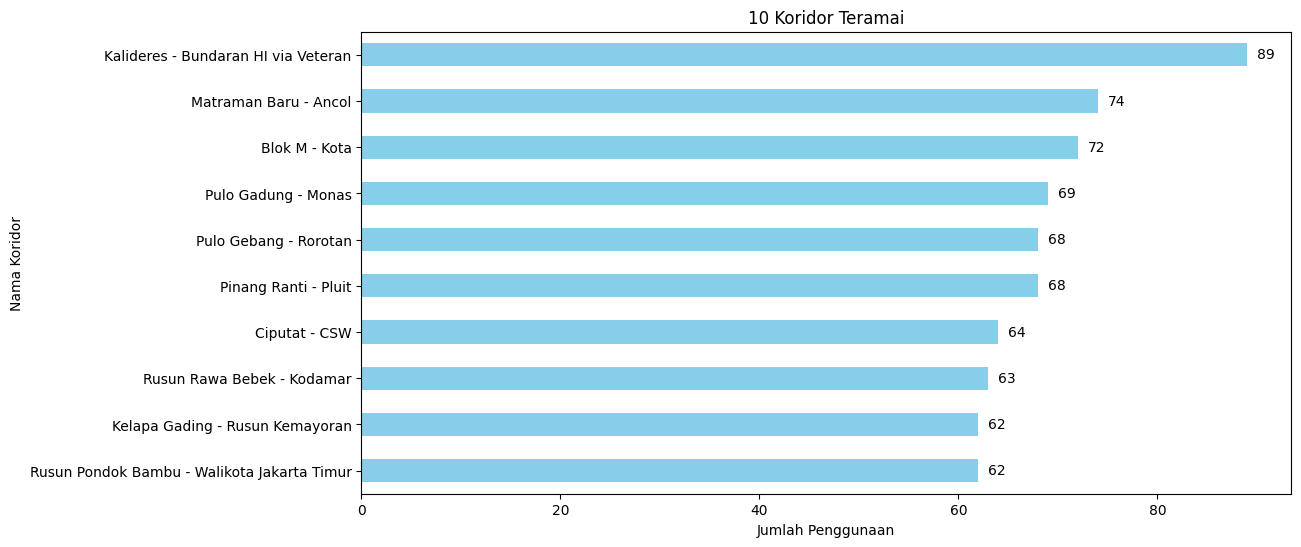

In [42]:
top_koridor = koridor['corridorName'].value_counts().head(10)
top_koridor = top_koridor.sort_values(ascending=True)

plt.figure(figsize=(12, 6))

ax = top_koridor.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Nama Koridor')
plt.title('10 Koridor Teramai')

for i, v in enumerate(top_koridor):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

Dari grafik diatas, koridor **Kalideres-Bundaran HI via Veteran** menjadi koridor yang paling banyak digunakan sebanyak **89** kali.

#### Peak Hour

Kali ini akan dibuat temuan untuk melihat di waktu apa perjalanan paling banyak dilakukan.

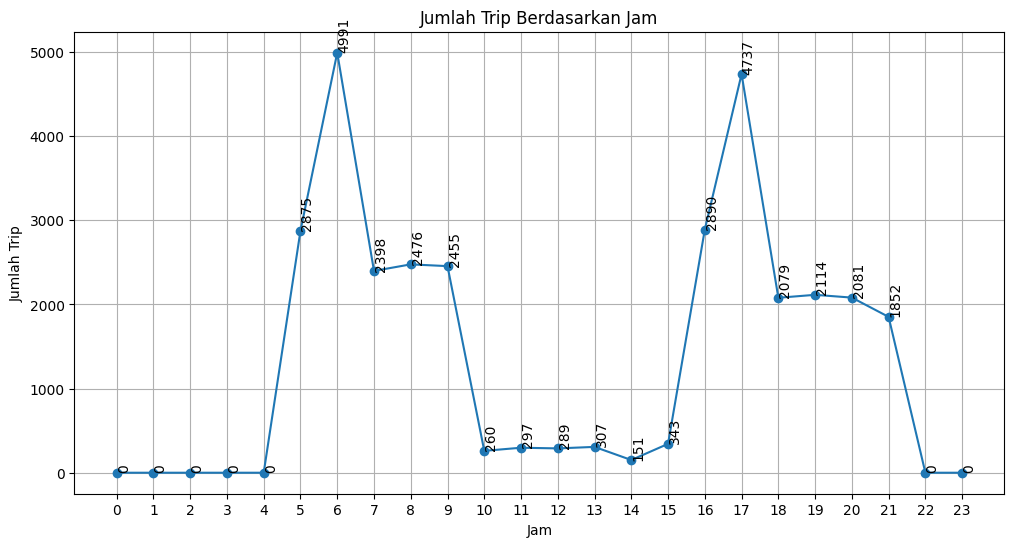

In [43]:
# Mengelompokkan data berdasarkan 'tapInHour' dan menghitung jumlah trip
grouped_data = df.groupby('tapInHour').size().reset_index(name='jumlah_trip')

# Membuat DataFrame dengan semua jam dari 0 hingga 23
all_hours = pd.DataFrame({'tapInHour': range(24)})

# Gabungkan data yang ada dengan semua jam
grouped_data = all_hours.merge(grouped_data, on='tapInHour', how='left')
grouped_data['jumlah_trip'].fillna(0, inplace=True)
grouped_data = grouped_data.sort_values(by='tapInHour')

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['tapInHour'], grouped_data['jumlah_trip'], marker='o', linestyle='-')
plt.xlabel('Jam')
plt.ylabel('Jumlah Trip')
plt.title('Jumlah Trip Berdasarkan Jam')
plt.xticks(range(24))
plt.grid()

for i, j in zip(grouped_data['tapInHour'], grouped_data['jumlah_trip']):
    plt.text(i, j, str(int(j)), ha='left', va='bottom', rotation='vertical')

plt.show()

Dari grafik diatas, peak hours atau puncak jam kesibukan terdapat di **jam 5 sampai jam 6** di pagi hari dan **jam 4 sampai jam 5** di sore hari.

#### Trip Per Kategori

Disini ingin dilihat jenis lama perjalanan apa yang paling sering dilakukan oleh pengguna *Transjakarta*.

In [44]:
tripCat = koridor['tripCategory'].value_counts().reset_index()
tripCat

,tripCategory,count
0,Short Trip,4348
1,Medium Trip,3474
2,Very Short Trip,1656
3,Long Trip,47


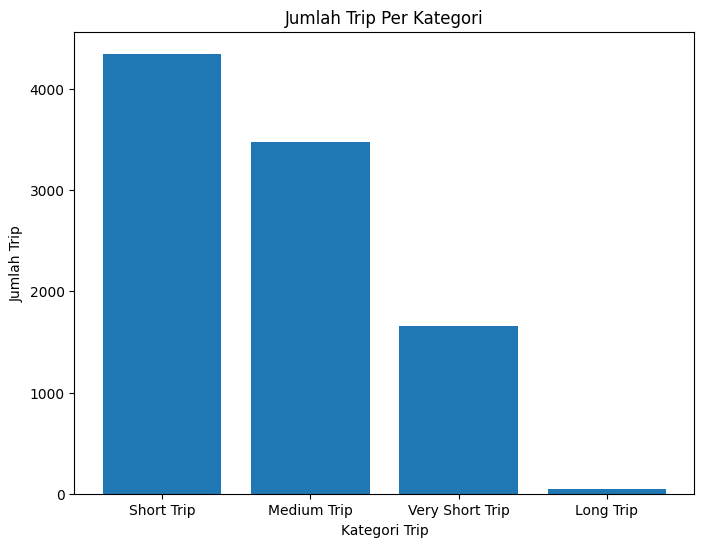

In [45]:
plt.figure(figsize=(8, 6))
plt.bar(tripCat['tripCategory'], tripCat['count'])
plt.xlabel('Kategori Trip')
plt.ylabel('Jumlah Trip')
plt.title('Jumlah Trip Per Kategori')

plt.show()

Dari grafik diatas, diketahui **Short Trip** atau perjalanan yang dilakukan satu jam ialah jenis perjalanan yang paling banyak dilakukan sebanyak **4348** kali.

#### Trip Berdasarkan Ketegori Trip dan Jenis Transaksi

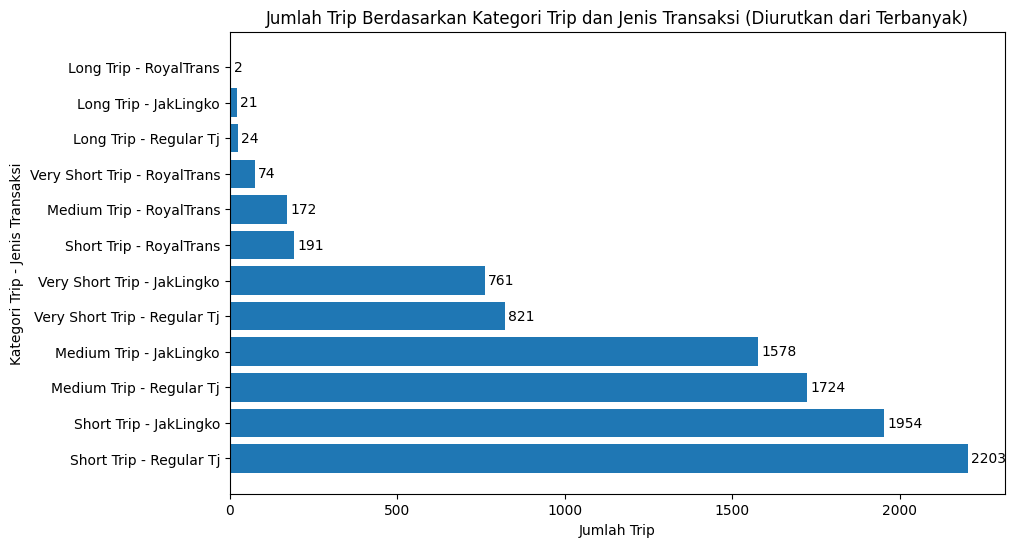

In [46]:
# Menghitung jumlah trip berdasarkan kategori trip dan jenis transaksi
trip = koridor.groupby(['tripCategory', 'transType']).size().reset_index(name='jumlah_trip')
trip = trip.sort_values(by='jumlah_trip', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(trip['tripCategory'] + ' - ' + trip['transType'], trip['jumlah_trip'])
plt.xlabel('Jumlah Trip')
plt.ylabel('Kategori Trip - Jenis Transaksi')
plt.title('Jumlah Trip Berdasarkan Kategori Trip dan Jenis Transaksi (Diurutkan dari Terbanyak)')

for i, v in enumerate(trip['jumlah_trip']):
    plt.text(v + 10, i, str(v), va='center', fontsize=10)

plt.show()

Dari grafik diatas, diketahui **Regular Transjakarta dengan jenis Short Trip** yang paling banyak perjalanannya sebanyak **2203** kali dan **RoyalTrans dengan jenis Long Trip** dyang paling dikit melakukan perjalanan yaitu hanya **2** kali.

## **Kesimpulan dan Rekomendasi**
---

Berdasarkan analisis yang telah dilakukan, terdapat beberapa kesimpulan dan rekomendasi yang dapat diberikan kepada Transjakarta untuk meningkatkan efektivitas, efisiensi, dan profitabilitas operasinya:

### **Kesimpulan**

1. Kartu DKI adalah kartu yang paling banyak digunakan oleh pengguna Transjakarta, dengan persentase sebesar 49.2%.

2. Kelompok umur 31-40 adalah kelompok yang paling sering melakukan perjalanan, sementara kelompok usia Elderly (lanjut usia) merupakan yang paling sedikit melakukan perjalanan.

3. Koridor Kalideres-Bundaran HI via Veteran adalah koridor yang paling banyak digunakan.

4. Puncak jam kesibukan terjadi pada jam 5-6 pagi dan 4-5 sore. Hal ini dikarenakan jam-jam tersebut digunakan orang dalam berangkat dan pulang beraktifitas.

5. Jenis perjalanan Short Trip adalah yang paling banyak dilakukan.

6. Regular Transjakarta dengan jenis Short Trip adalah yang paling banyak dilakukan.

### **Rekomendasi**

1. Meningkatkan promosi dan pemanfaatan Kartu DKI sebagai metode pembayaran yang efektif dengan strategi loyalitas pelanggan.

2. Menyelenggarakan promosi atau program khusus untuk menarik lebih banyak pelanggan dari kelompok usia 31-40 tahun.

3. Fokus pada perawatan dan pelayanan yang optimal di Koridor Kalideres-Bundaran HI via Veteran untuk meningkatkan pengalaman pengguna.

4. Pertimbangkan peningkatan frekuensi layanan atau penambahan armada selama jam puncak untuk mengatasi lonjakan permintaan.

5. Pertimbangkan strategi tarif atau penawaran khusus untuk jenis perjalanan Short Trip.

6. Lakukan promosi atau penyesuaian layanan untuk menarik lebih banyak pelanggan untuk jenis perjalanan seperti RoyalTrans dengan jenis Long Trip.